In [1]:
import suvtools as suv
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.dpi"] = 150
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.weight"] = 'light'
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
data = suv.load("../dataset/sample_data.txt", 12)
# url = "https://raw.githubusercontent.com/pranabdas/suvtools/master/dataset/sample_data.txt"
# data = suv.load(url, 12)

In [3]:
suv.calc_area(data[:, 6], data[:, 0], 20, 120)

np.float64(270053.0999999991)

In [4]:
# %run "../test.py"

In [5]:
# suv.save_csv("../dataset/sample_data.txt")

In [6]:
print(data[:2, :])

[[ 3.00000e+00  1.50000e+00 -7.67775e-04  3.64530e-05  1.32849e-01
   2.41700e+03  2.22000e+02  0.00000e+00  1.00000e+00  8.40872e+05
   0.00000e+00]
 [ 3.02000e+00  1.51000e+00 -7.72892e-04  3.66960e-05  1.33734e-01
   2.41800e+03  2.33000e+02  0.00000e+00  1.00000e+00  8.40738e+05
   0.00000e+00]]


In [7]:
x = data[:, 0]
y = data[:, 6]

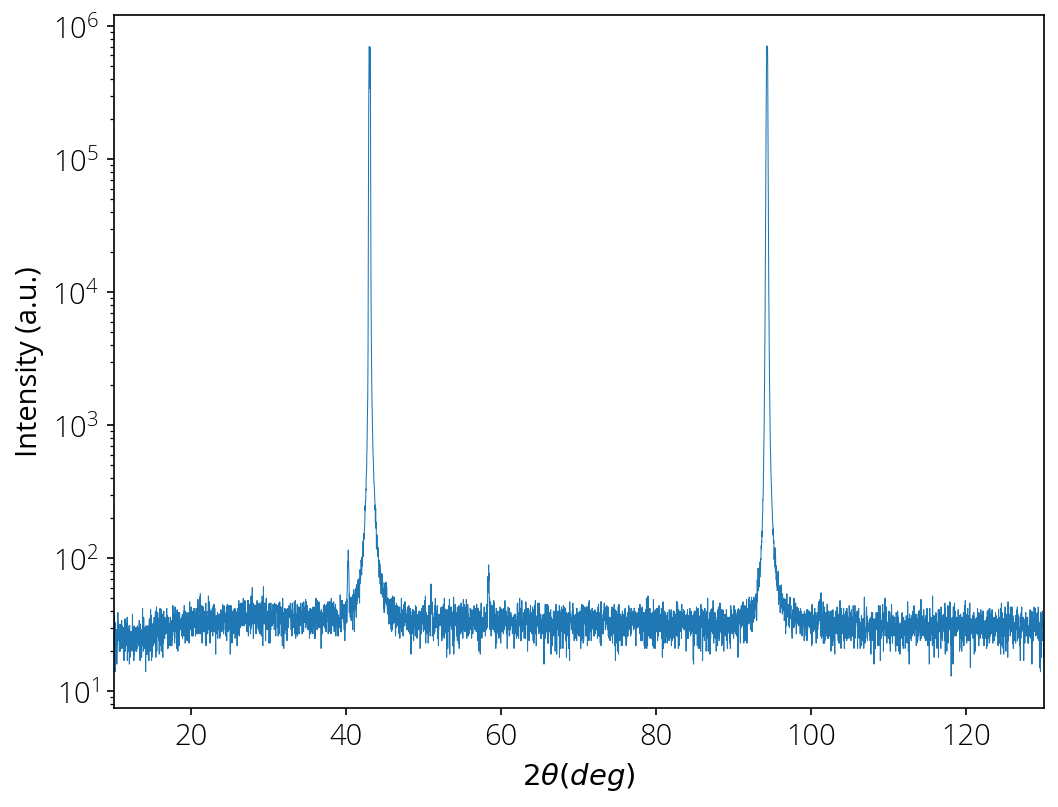

In [8]:
plt.semilogy(x, y, linewidth=0.5)
plt.xlabel("$2\\theta (deg)$")
plt.ylabel("Intensity (a.u.)")
plt.xlim(10, 130)
plt.show()

In [9]:
x_fit, y_fit = suv.fit_gauss(x, y, xmin=93, xmax=95)


#---- Gaussian fitting parameters ----#
a = 725203.2202698857 
x0 = 94.30231720686922 
sigma = 0.07756533815550148 
FWHM = 0.182666371356206 
#----------------------------------------#


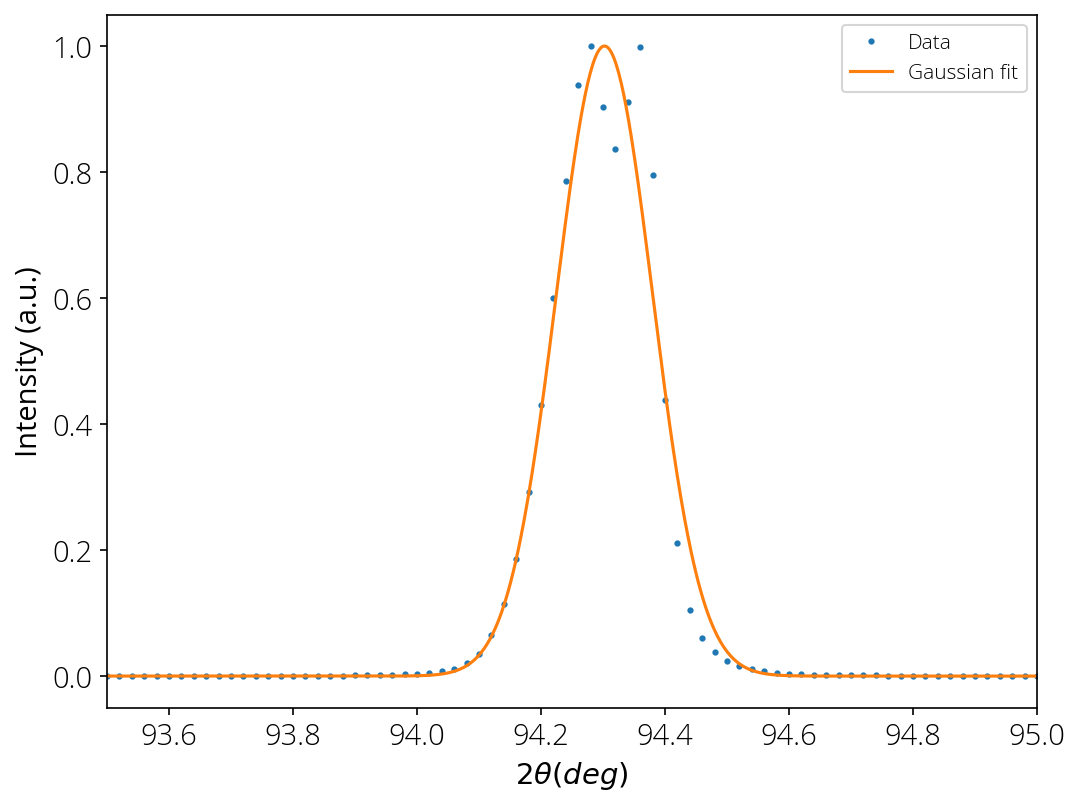

In [10]:
plt.plot(x, y/max(y), 'o', markersize=2, label='Data')
plt.plot(x_fit, y_fit/max(y_fit), label='Gaussian fit')
plt.xlabel("$2\\theta (deg)$")
plt.ylabel("Intensity (a.u.)")
plt.xlim(93.5, 95)
plt.legend()
plt.show()

In [11]:
s1 = suv.load("../dataset/sample_XAS.txt", 1)
s2 = suv.load("../dataset/sample_XAS.txt", 2)

In [12]:
# lock peak of second spectra at same energy as first spectra
# interested only in the first peak, therefore limit the peak search to [525, 535]
s2 = suv.lock_peak(s2, s1, 525, 535)

In [13]:
# subtract background and normalize
# linear background based on data values at energy point 520 and 528
# normalize the intensity corresponding to energy value 545
i1 = suv.norm_bg(s1[:, 0], s1[:, 9]/s1[:, 4], 520, 528, 545)
i2 = suv.norm_bg(s2[:, 0], s2[:, 9]/s2[:, 4], 520, 528, 545)

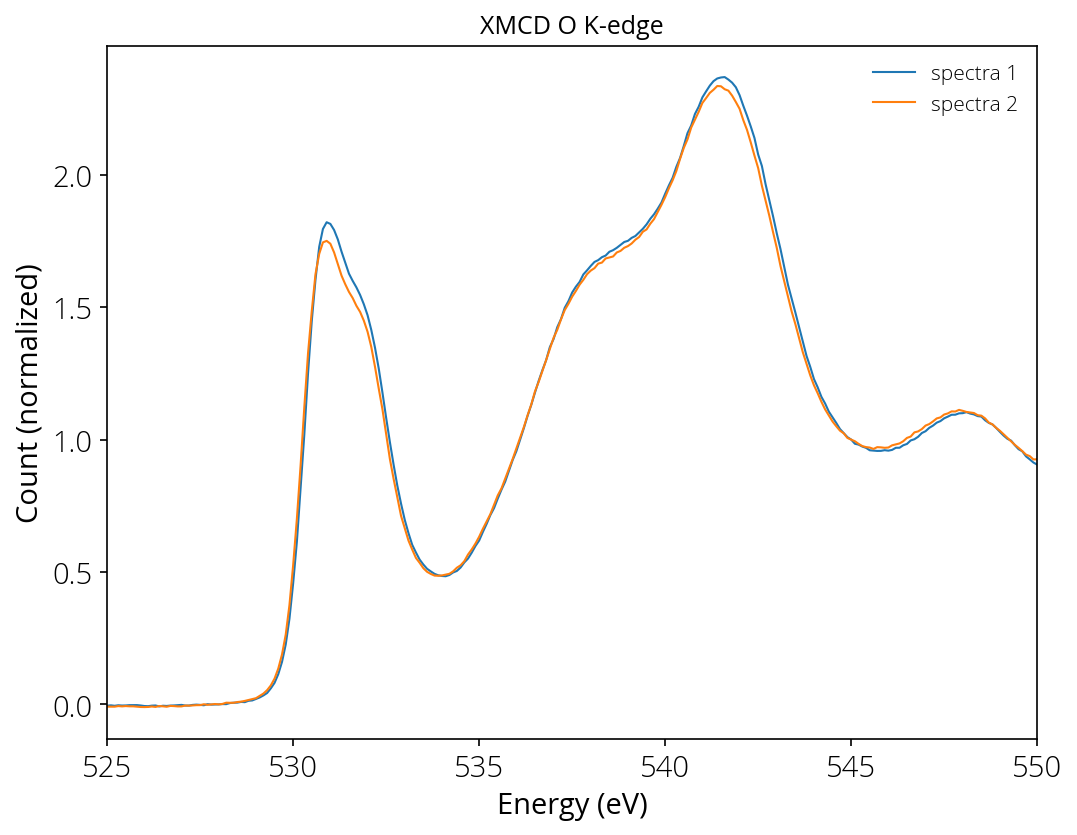

In [14]:
plt.plot(s1[:, 0], i1, '-', linewidth=1, label="spectra 1")
plt.plot(s2[:, 0], i2, '-', linewidth=1, label="spectra 2")

plt.xlabel("Energy (eV)")
plt.ylabel("Count (normalized)")
plt.title("XMCD O K-edge")
plt.xlim(525, 550)
plt.legend(frameon=False)
plt.show()